# DATASET DE YELP

A continuación se realiza el análisis preliminar del DATASET DE YELP

Importamos librerías

In [1]:
import pandas as pd
import numpy as np
import json # Para trabajar con JSON
from pandas import json_normalize
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
#from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Descargar los stopwords en español e inglés
nltk.download('stopwords')
stop_words = set(stopwords.words('english') + stopwords.words('spanish'))

# Configurar estilo de visualización
sns.set(style="whitegrid", palette="muted")
#plt.rcParams["figure.figsize"] = (12, 6)

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to C:\Users\JS
[nltk_data]     Digital\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Extraccción, Tranformación y Carga de Datos (ETL)

In [2]:
data_business = pd.read_pickle('D:/2024/HenryData/PF/Datos_Crudos/yelp/business.pkl')

In [3]:
data_business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_business.info()


<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

In [5]:
data_business.shape

(150346, 28)

Se oberva que las columnas del del 15 al 28 tienen el mismo nombre que las primeras columnas del 0 al 14, y que no contienen información relevante, se procede hacer el recorte

In [6]:
df_business = data_business.iloc[:, :14]

In [7]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


In [8]:
df_business.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


In [9]:
df_business.columns.tolist()

['business_id',
 'name',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'stars',
 'review_count',
 'is_open',
 'attributes',
 'categories',
 'hours']

La información que contiene el dataset business por cada una de sus columnas se describe y detalla a continuación:

**1. business_id**: Identificador único de cada negocio. Es de tipo objecto y no tiene valores nulos.
Ejemplo: 'Pns2l4eNsfO8kk83dixA6A'.

**2. name**: Nombre del negocio. Es de tipo objecto y no tiene valores nulos.
Ejemplo: 'Abby Rappoport, LAC, CMQ'.

**3. address**: Dirección física del negocio. Es de tipo objecto y no tiene valores nulos.
Ejemplo: '1616 Chapala St, Ste 2'.

**4. city**: Ciudad donde se encuentra el negocio. Es de tipo objecto y no tiene valores nulos.
Ejemplo: 'Santa Barbara'.

**5. state**: Estado donde se encuentra el negocio. Es de tipo objecto y contiene 3 valores nulos.
Ejemplo: 'CA'.

**6. postal_code**: Código postal asociado a la dirección del negocio. Es de tipo objecto y no tiene valores nulos.
Ejemplo: '93101'.

**7. latitude**: Coordenada de latitud de la ubicación del negocio. Es de tipo objecto, pero debería convertirse en un float para facilitar el análisis geoespaciales.
Ejemplo: '34.426679'.

**8. longitude**: Coordenada de longitud de la ubicación del negocio. Es de tipo objecto, pero debería convertirse en un float.
Ejemplo: '-119.711197'.

**9. stars**: Calificación promedio del negocio en estrellas (en una escala de 1 a 5). Es de tipo objecto, pero debería convertirse en un float.
Ejemplo: '5.0'.

**10. review_count**: Número de reseñas que ha recibido el negocio. Es de tipo objecto, pero debería convertirse en un int.
Ejemplo: '7'.

**11. is_open**: Indicador de si el negocio está abierto (1) o cerrado (0). Es de tipo objecto, pero debería convertirse en int.
Ejemplo: '0'.

**12. attributes**: Información adicional sobre el negocio, almacenada en formato JSON o similar. Contiene valores nulos y es de tipo objecto. Requiere procesamiento para desandar los datos.
Ejemplo: {'ByAppointmentOnly': 'True'}.

**13. categories**: Categorías asociadas al negocio, almacenadas como una lista de valores separados por comas. Contiene 103 valores nulos y es de tipo objecto.
Ejemplo: 'Doctors, Traditional Chinese Medicine, Naturopathy'.

**14. hours**: Horarios de operación del negocio, almacenados en formato JSON o similar. Contiene valores nulos y es de tipo objecto. Requiere procesamiento para desandar los datos.
Ejemplo: {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0'}.

In [10]:
# Verificar valores nulos
nulos_df = df_business.isnull().sum()
print("Valores faltantes por columna:")
print(nulos_df[nulos_df > 0])

Valores faltantes por columna:
state             3
attributes    13744
categories      103
hours         23223
dtype: int64


In [11]:
nulos_df.sum()

37073

In [12]:
# Completar los datos faltantes en la columna 'state'

id_to_state = {
    "Pns2l4eNsfO8kk83dixA6A": "CA",  # Santa Barbara
    "mpf3x-BjTdTEA3yCZrAYPw": "MO",  # Affton
    "tUFrWirKiKi_TAnsVWINQQ": "AZ"   # Tucson
}

# Actualizar la columna 'state' con base en el business_id
df_business["state"] = df_business.apply(
    lambda row: id_to_state[row["business_id"]] if pd.isnull(row["state"]) and row["business_id"] in id_to_state else row["state"],
    axis=1
)

In [13]:
df_business.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


In [14]:
# Eliminar filas con categorías o estados nulos
df_business = df_business.dropna(subset=['categories', 'state'])  

In [15]:
df_business.shape

(150243, 14)

## 2. Análisis de Datos Exproratorio (EDA)

Distribucón de Ratings

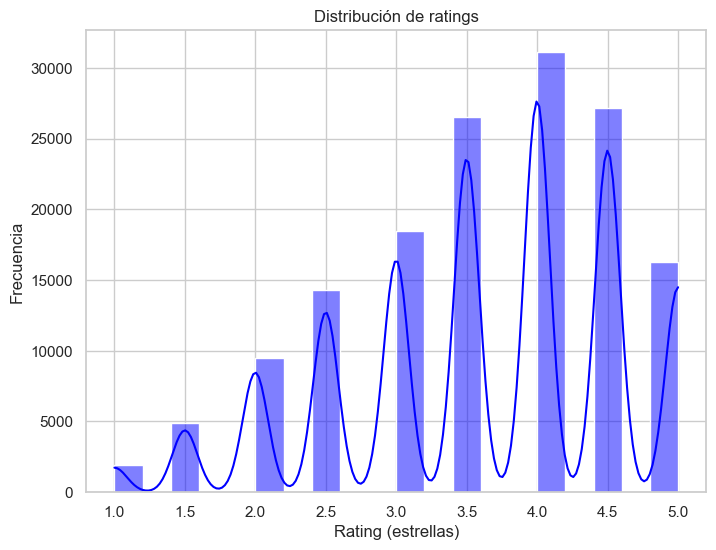

In [16]:
# Distribución de las estrellas (ratings)
plt.figure(figsize=(8, 6))
sns.histplot(df_business["stars"], kde=True, bins=20, color="blue")
plt.title("Distribución de ratings")
plt.xlabel("Rating (estrellas)")
plt.ylabel("Frecuencia")
plt.show()

Insight: Este análisis ayuda a entender si los negocios tienen predominantemente buenos o malos ratings.

Interpretación:
- En general, se oberva una concentración mayor en los ratings con puntuaciones más altas, es decir 4 y 5 estrellas, lo que nos indica que la mayoría de negocios en EE. UU. reciben evaluaciones positivas por parte de los clientes.
- La distribución presenta dos picos principales, uno alrededor de 3.5 estrellas y otro alrededor de 4.5 estrellas. Esto indica que existen dos grupos principales de negocios: aquellos que reciben ratings muy buenos (4.5-5 estrellas) y aquellos que reciben ratings moderadamente buenos (3.5-4 estrellas).
- La alta concentración de ratings positivos sugiere que los negocios en Estados Unidos compiten por ofrecer un buen servicio y productos de calidad para obtener buenas evaluaciones, sin embargo, los resultados pueden variar dependiendo de la categoria del negocio.

Análisis de Categorías Populares

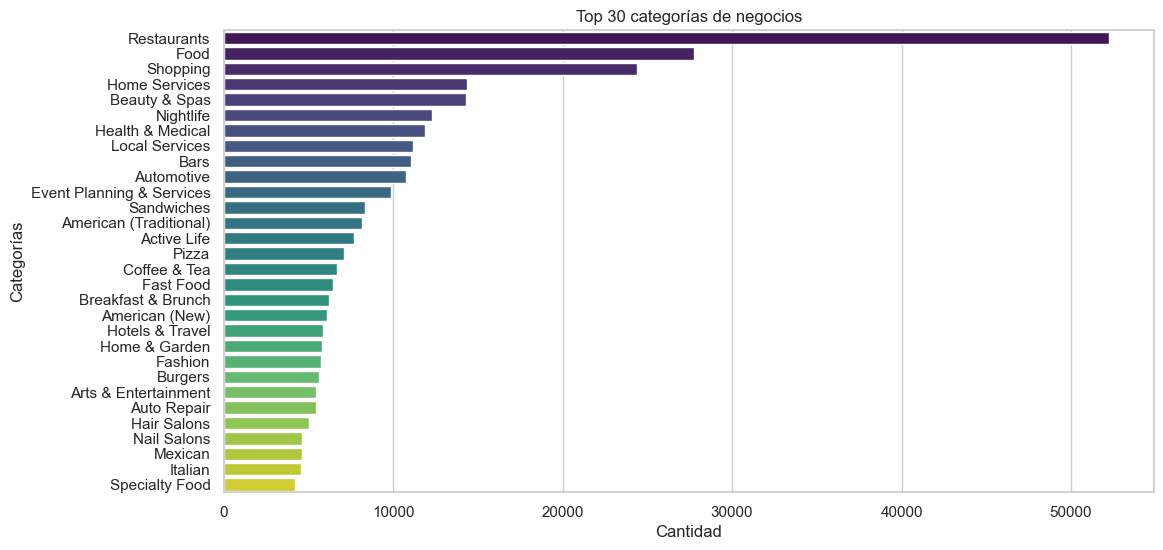

In [17]:
# Contar las categorías más comunes
df_business["categories"] = df_business["categories"].fillna("").apply(lambda x: x.split(", "))
categories = df_business["categories"].explode().value_counts().head(30)

# Visualizar las categorías más comunes
plt.figure(figsize=(12, 6))
sns.barplot(x=categories.values, y=categories.index, palette="viridis")
plt.title("Top 30 categorías de negocios")
plt.xlabel("Cantidad")
plt.ylabel("Categorías")
plt.show()

Insight: Identificar las categorías más populares permite focalizar análisis en sectores clave.

Interpretación:
- La categoria que predomida es la relacionada a alimentación, restaurantes y comida ocupan los dos primeros lugares, otras categorias relacionadas a laimentación estan los sandwiches, pizza, comidad rápida, etc. 
-  Otras categorías importantes son servicios para el hogar, belleza y spas, así como servicios locales en general. Esto indica una fuerte demanda de servicios a nivel local y una gran variedad de opciones para los consumidores.

Negocios Abiertos vs Cerrados

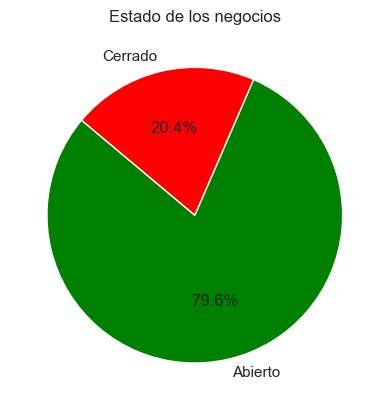

In [18]:
# Proporción de negocios abiertos y cerrados
status_counts = df_business["is_open"].value_counts()
labels = ["Abierto", "Cerrado"]

# Visualizar en un gráfico de pastel
plt.pie(status_counts, labels=labels, autopct="%1.1f%%", startangle=140, colors=["green", "red"])
plt.title("Estado de los negocios")
plt.show()

Insight: Este análisis da una perspectiva de qué porcentaje de negocios está actualmente operativo.

Interpretación:
De acuerdo al gráfico en la actualidad en EE.UU. el 79.6% de los negocios registrado en el dataset Yelp, estan Abierto, mientras que un 20.4% esta cerrado

Relación entre Número de Reseñas y Ratings

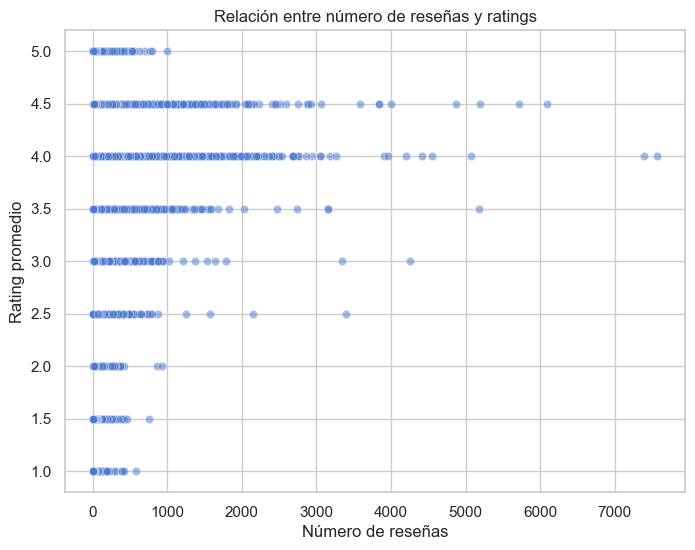

In [19]:
# Scatterplot entre número de reseñas y rating promedio
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_business, x="review_count", y="stars", alpha=0.5)
plt.title("Relación entre número de reseñas y ratings")
plt.xlabel("Número de reseñas")
plt.ylabel("Rating promedio")
plt.show()

Insight: Esto puede mostrar si los negocios con más reseñas tienden a tener ratings más altos o más bajos.

Interpretación:
- Los negocios con mayor número de reseñas suelen tner ratings promedio entre 4.0 y 5.0, lo que indica que los negocios más populares tienden a revibir buenas calificaciones.
- Existe una alta densidad de puntos en el rango de 4.0 a 5.0 estrellas, lo que indica que la mayoría de los negocios tienen buenas calificaciones. Sin embargo, no todos tienen una gran cantidad de reseñas.
- No se observa una fuerte correlación lineal entre el número de reseñas y el rating promedio, pero sí una tendencia donde las reseñas positivas predominan en negocios más populares.

Análisis Geográfico

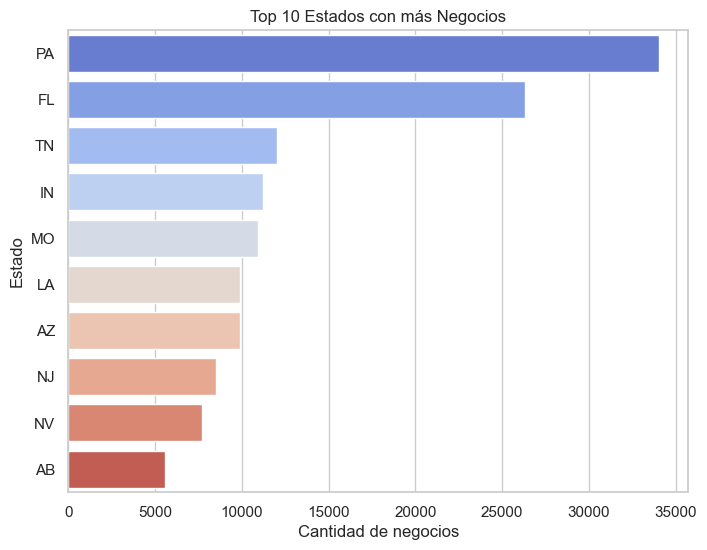

In [20]:
# Distribución de negocios por estado
state_counts = df_business["state"].value_counts().head(10)

# Visualizar distribución por estado
plt.figure(figsize=(8, 6))
sns.barplot(x=state_counts.values, y=state_counts.index, palette="coolwarm")
plt.title("Top 10 Estados con más Negocios")
plt.xlabel("Cantidad de negocios")
plt.ylabel("Estado")
plt.show()

Interpretación:

- Pennsylvania (PA): Lidera el ranking, con una cantidad significativamente mayor de negocios en comparación con los demás estados.
- Florida (FL): Ocupa el segundo lugar, destacando también por su gran cantidad de negocios.
- Tennessee (TN), Indiana (IN), Missouri (MO), Louisiana (LA), Arizona (AZ), Nueva Jersey (NJ), Nevada (NV) y Alabama (AB): Completan los 10 primeros lugares, aunque con una menor cantidad de negocios en comparación con los dos primeros.

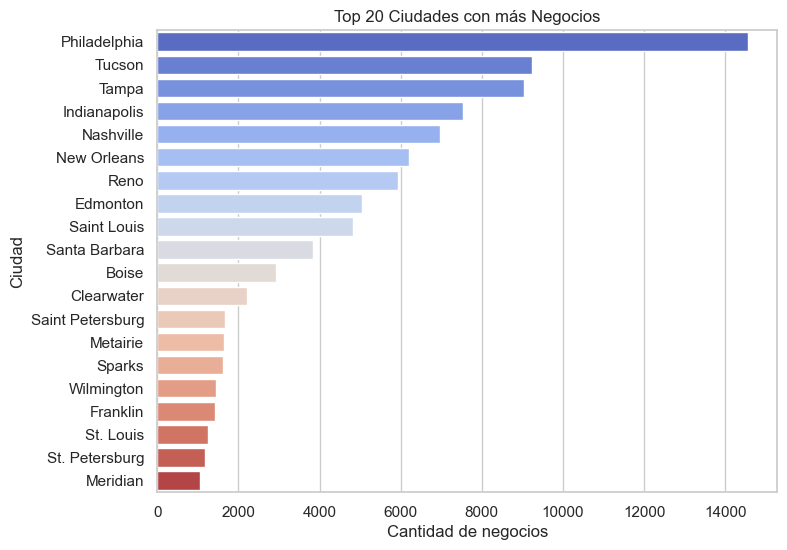

In [21]:
# Distribución de negocios por ciudad
state_counts = df_business["city"].value_counts().head(20)

# Visualizar distribución por estado
plt.figure(figsize=(8, 6))
sns.barplot(x=state_counts.values, y=state_counts.index, palette="coolwarm")
plt.title("Top 20 Ciudades con más Negocios")
plt.xlabel("Cantidad de negocios")
plt.ylabel("Ciudad")
plt.show()

Interpretación:
- La ciudad de Philadelphia, lidera el rantking de ciudades con mayor cantidad de negocios, seguido de Tucson y Tampa

Análisis de las 30 Categorías con Reseñas Positivas (4-5 Estrellas)

In [24]:
# Filtrar reseñas positivas (4 a 5 estrellas)
positive_reviews = df_business.loc[df_business["stars"].between(4, 5), ["categories"]].copy()

# Convertir 'categories' a listas si no lo son y manejar valores nulos
positive_reviews["categories"] = positive_reviews["categories"].apply(
    lambda x: x.split(", ") if isinstance(x, str) else x if isinstance(x, list) else []
)

# Expandir categorías en filas individuales
expanded_categories = positive_reviews.explode("categories")

# Contar reseñas por categoría, ignorando categorías vacías o nulas
category_counts = expanded_categories["categories"].dropna().value_counts()

# Obtener el top 30 de categorías
top_30_categories = category_counts.head(30).reset_index()
top_30_categories.columns = ["category", "review_count"]

# Mostrar el resultado
print(top_30_categories)

                     category  review_count
0                 Restaurants         23348
1                        Food         14976
2                    Shopping         12303
3               Beauty & Spas          8331
4               Home Services          6812
5            Health & Medical          6109
6                   Nightlife          5934
7              Local Services          5840
8                        Bars          5301
9   Event Planning & Services          5235
10                Active Life          5114
11                 Automotive          4900
12                 Sandwiches          3866
13       Arts & Entertainment          3577
14               Coffee & Tea          3372
15                Hair Salons          3331
16         Breakfast & Brunch          3113
17     American (Traditional)          2927
18             Specialty Food          2876
19             American (New)          2831
20              Home & Garden          2814
21                Auto Repair   

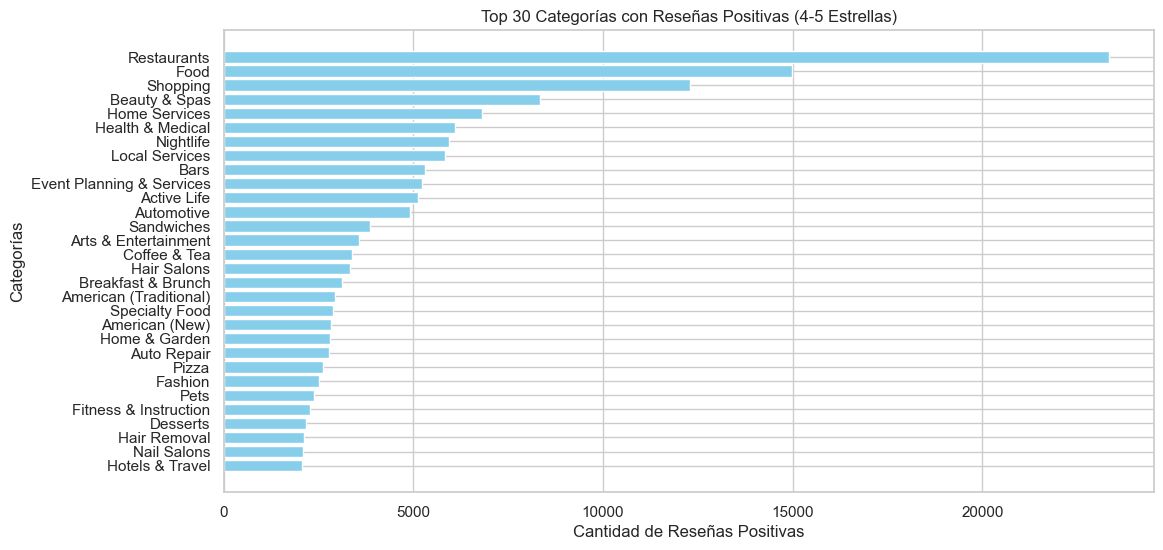

In [25]:
# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(top_30_categories["category"], top_30_categories["review_count"], color='skyblue')
plt.xlabel("Cantidad de Reseñas Positivas")
plt.ylabel("Categorías")
plt.title("Top 30 Categorías con Reseñas Positivas (4-5 Estrellas)")
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el top primero
plt.show()

Interpretación:

- La categoria de alimentación predomida, ya que categorias como Restaurants y Food lideran el ranking de negocios con mayor cantidad de reseñas positivas, además de estar valorados en el ranting de estrellas de 4 a 5.
- Le siguen categorias como Beauty & Spas. 


### Recomendaciones

Se recomienda realizar un EDA más profundo de acuerdo a los hallazgos encontrados en este análisis exploratorio de los datos de Yelp.

---------------------------

### Archivo tip

In [26]:
# Ruta al archivo JSON
file_path = 'D:/2024/HenryData/PF/Datos_Crudos/yelp/tip.json'

# Abrir el archivo especificando la codificación
with open(file_path, 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file]

In [27]:
# Ver las primeras filas
print(data[:5])

[{'user_id': 'AGNUgVwnZUey3gcPCJ76iw', 'business_id': '3uLgwr0qeCNMjKenHJwPGQ', 'text': 'Avengers time with the ladies.', 'date': '2012-05-18 02:17:21', 'compliment_count': 0}, {'user_id': 'NBN4MgHP9D3cw--SnauTkA', 'business_id': 'QoezRbYQncpRqyrLH6Iqjg', 'text': 'They have lots of good deserts and tasty cuban sandwiches', 'date': '2013-02-05 18:35:10', 'compliment_count': 0}, {'user_id': '-copOvldyKh1qr-vzkDEvw', 'business_id': 'MYoRNLb5chwjQe3c_k37Gg', 'text': "It's open even when you think it isn't", 'date': '2013-08-18 00:56:08', 'compliment_count': 0}, {'user_id': 'FjMQVZjSqY8syIO-53KFKw', 'business_id': 'hV-bABTK-glh5wj31ps_Jw', 'text': 'Very decent fried chicken', 'date': '2017-06-27 23:05:38', 'compliment_count': 0}, {'user_id': 'ld0AperBXk1h6UbqmM80zw', 'business_id': '_uN0OudeJ3Zl_tf6nxg5ww', 'text': 'Appetizers.. platter special for lunch', 'date': '2012-10-06 19:43:09', 'compliment_count': 0}]


In [28]:
# Convertir los datos a un DataFrame de pandas
df_tip = pd.DataFrame(data)

In [29]:
df_tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [30]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           908915 non-null  object
 1   business_id       908915 non-null  object
 2   text              908915 non-null  object
 3   date              908915 non-null  object
 4   compliment_count  908915 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 34.7+ MB


In [31]:
df_tip.shape

(908915, 5)

In [32]:
# Revisar los valores nulos
print(df_tip.isnull().sum())

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64


In [33]:
# Revisar valores duplicados
df_tip.duplicated().sum()

67

In [34]:
df_tip = df_tip.drop_duplicates()

In [35]:
#Data despues de la limpieza
df_tip.shape

(908848, 5)

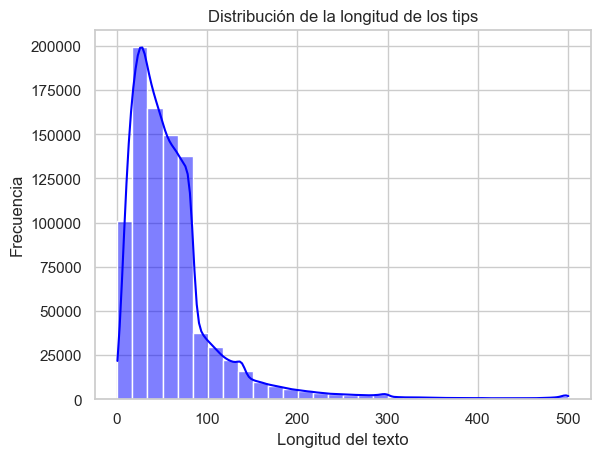

In [36]:
# Calcular la longitud de los tips
df_tip['tip_length'] = df_tip['text'].apply(len)

# Distribución de la longitud
sns.histplot(df_tip['tip_length'], bins=30, kde=True, color='blue')
plt.title('Distribución de la longitud de los tips')
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.show()

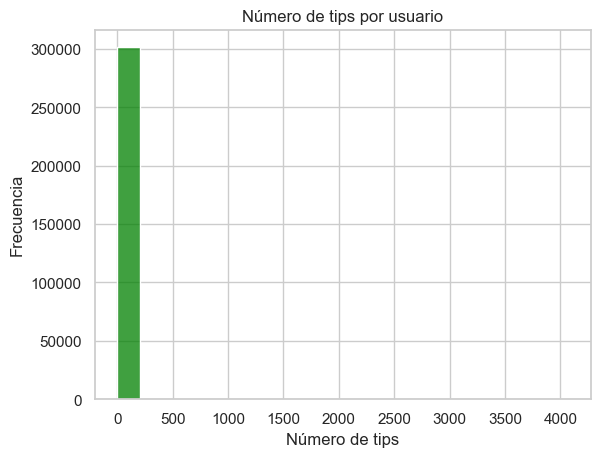

In [37]:
# Contar tips por usuario
user_tips = df_tip['user_id'].value_counts()

sns.histplot(user_tips, bins=20, kde=False, color='green')
plt.title('Número de tips por usuario')
plt.xlabel('Número de tips')
plt.ylabel('Frecuencia')
plt.show()

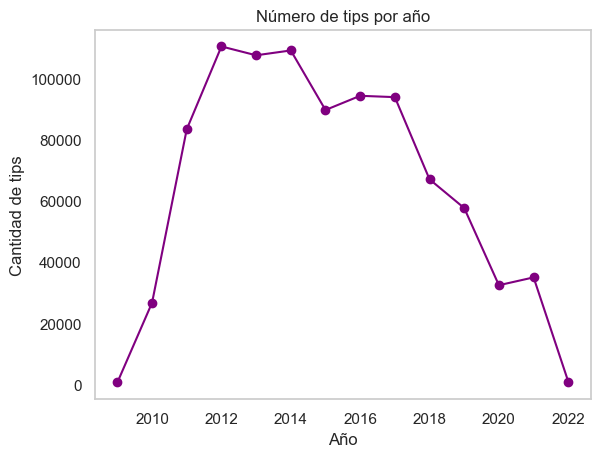

In [38]:
# Convertir la columna de tiempo a formato datetime
df_tip['date'] = pd.to_datetime(df_tip['date'])

# Extraer año y mes para análisis temporal
df_tip['year'] = df_tip['date'].dt.year
df_tip['month'] = df_tip['date'].dt.month

# Análisis del número de tips por año
tips_per_year = df_tip.groupby('year').size()

plt.plot(tips_per_year.index, tips_per_year.values, marker='o', linestyle='-', color='purple')
plt.title('Número de tips por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de tips')
plt.grid()
plt.show()

Nube de palabras con los tips

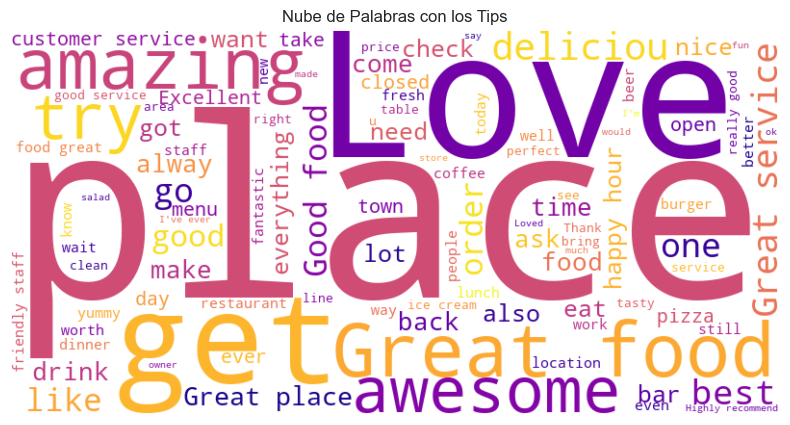

In [39]:
# Concatenamos todas las descripciones del título en una sola cadena
texto_nube = ' '.join(df_tip['text'])

# Creamos la nube de palabras
nube_palabras = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400, colormap='plasma').generate(texto_nube)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras con los Tips')
plt.show()

En general los tips de los clientes tiene:

Un enfoque positivo predominante :
Muchas palabras y frases como "Great", "awesome", "best" y "amazing" sugieren que los usuarios prefieren compartir experiencias positivas y destacar lo mejor de los lugares visitados.

Las recomendaciones directas :
Los términos como "probar", "obtener" y "comprobar" muestran una inclinación hacia la recomendación activa de ciertos platillos, bebidas o características del lugar.

El énfasis en la experiencia integral :
La combinación de términos relacionados con la comida ("food", "delicious") y el servicio ("friendly staff", "Great service") indica que las recomendaciones no solo se enfocan en un aspecto, sino en la experiencia completa.

Contexto social :
Palabras como "back", "time", "fun" y "happy hour" pueden reflejar experiencias agradables asociadas a momentos sociales o de esparcimiento.

**Conclusiones:**

Los consejos parecen actuar como mini-reseñas enfocadas en puntos positivos que otros usuarios deberían considerar.
Existe una fuerte asociación entre la calidad de la comida y la calidad del servicio como aspectos clave para la recomendación de restaurantes.
Los tips a menudo sugieren acciones específicas, lo que podría ser útil para identificar aspectos populares de cada restaurante (como platillos recomendados).

----

### Archivo checkin

In [40]:
# Ruta al archivo JSON
file_path = 'D:/2024/HenryData/PF/Datos_Crudos/yelp/checkin.json'

# Abrir el archivo especificando la codificación
with open(file_path, 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file]

In [41]:
# Convertir los datos a un DataFrame de pandas
df_checkin = pd.DataFrame(data)

In [42]:
df_checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [43]:
df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [44]:
df_checkin.shape

(131930, 2)

In [45]:
# Contar valores nulos por columna
print("Valores nulos por columna:")
print(df_checkin.isnull().sum())

Valores nulos por columna:
business_id    0
date           0
dtype: int64


In [46]:
# Verificar si hay duplicados
print(f"El dataset tiene {df_checkin.duplicated().sum()} filas duplicadas.")

El dataset tiene 0 filas duplicadas.


---

### Archivo user

In [47]:
# Ruta del archivo Parquet
file_path = "D:/2024/HenryData/PF/Datos_Crudos/yelp/user.parquet"

# Cargar los datos en un DataFrame
df_user = pd.read_parquet(file_path)

In [48]:
# Ver las primeras filas para entender la estructura de los datos
df_user.head(2)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,250,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946


In [49]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


In [50]:
df_user.shape

(2105597, 22)

In [51]:
# Contar valores nulos por columna
print("Valores nulos por columna:")
print(df_user.isnull().sum())

Valores nulos por columna:
user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64


In [52]:
# Verificar si hay duplicados
print(f"El dataset tiene {df_user.duplicated().sum()} filas duplicadas.")

El dataset tiene 117700 filas duplicadas.


In [53]:
# Eliminar duplicados
df_user = df_user.drop_duplicates()

In [54]:
df_user.shape

(1987897, 22)

In [55]:
if 'review_count' in df_user.columns:
    top_users = df_user.nlargest(10, 'review_count')
    print("Usuarios más activos:\n", top_users[['user_id', 'review_count']])

Usuarios más activos:
                        user_id  review_count
17169   Hi10sGSZNxQH3NLyWSZ1oA         17473
795339  8k3aO-mPeyhbR5HUucA5aA         16978
4723    hWDybu_KvYLSdEFzGrniTw         16567
606393  RtGqdDBvvBCjcu5dUqwfzA         12868
152     P5bUL3Engv-2z6kKohB6qQ          9941
3977    nmdkHL2JKFx55T3nq5VziA          8363
17727   bQCHF5rn5lMI9c5kEwCaNA          8354
7394    8RcEwGrFIgkt9WQ35E6SnQ          7738
10873   Xwnf20FKuikiHcSpcEbpKQ          6766
1229    CxDOIDnH8gp9KXzpBHJYXw          6679


In [56]:
if 'elite' in df_user.columns:
    elite_users = df_user[df_user['elite'] != ''].shape[0]
    print(f"Hay {elite_users} usuarios que forman parte del programa 'elite'.")

Hay 91198 usuarios que forman parte del programa 'elite'.


----

### Archivo review

In [57]:
# Ruta al archivo JSON
file_path = 'D:/2024/HenryData/PF/Datos_Crudos/yelp/review.json'

# Abrir el archivo especificando la codificación
with open(file_path, 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file]

In [58]:
# Convertir los datos a un DataFrame de pandas
df_review = pd.DataFrame(data)

In [59]:
df_review.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18


In [60]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [61]:
df_review.shape

(6990280, 9)

In [62]:
# Valores nulos por columna
print("Valores nulos por columna:")
print(df_review.isnull().sum())

# Filas duplicadas
print(f"Filas duplicadas: {df_review.duplicated().sum()}")

Valores nulos por columna:
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64
Filas duplicadas: 0


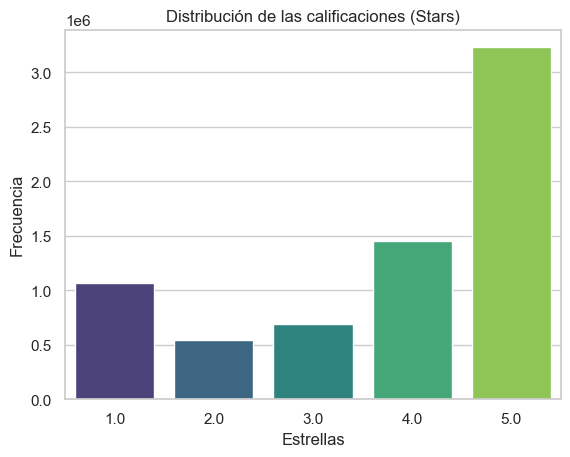

In [63]:
# Distribución de la columna 'stars'
sns.countplot(data=df_review, x='stars', palette='viridis')
plt.title("Distribución de las calificaciones (Stars)")
plt.xlabel("Estrellas")
plt.ylabel("Frecuencia")
plt.show()

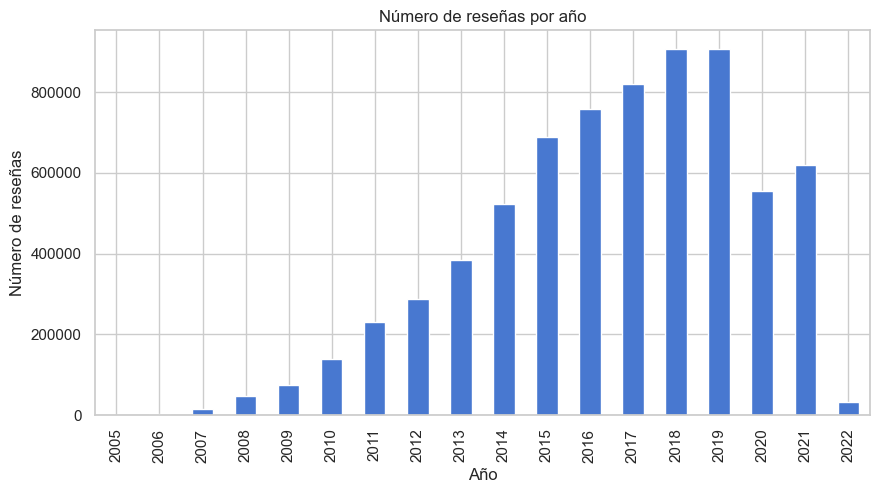

In [65]:
# Convertir 'date' a formato datetime
df_review['date'] = pd.to_datetime(df_review['date'])

# Extraer el año de las reviews
df_review['year'] = df_review['date'].dt.year

# Reviews por año
reviews_by_year = df_review['year'].value_counts().sort_index()

# Visualizar
reviews_by_year.plot(kind='bar', figsize=(10, 5))
plt.title("Número de reseñas por año")
plt.xlabel("Año")
plt.ylabel("Número de reseñas")
plt.show()

Usuarios más activos:
 user_id
_BcWyKQL16ndpBdggh2kNA    3048
Xw7ZjaGfr0WNVt6s_5KZfA    1840
0Igx-a1wAstiBDerGxXk2A    1747
-G7Zkl1wIWBBmD0KRy_sCw    1682
ET8n-r7glWYqZhuR6GcdNw    1653
bYENop4BuQepBjM1-BI3fA    1578
1HM81n6n4iPIFU5d2Lokhw    1554
fr1Hz2acAb3OaL3l6DyKNg    1447
wXdbkFZsfDR7utJvbWElyA    1396
Um5bfs5DH6eizgjH3xZsvg    1391
Name: count, dtype: int64


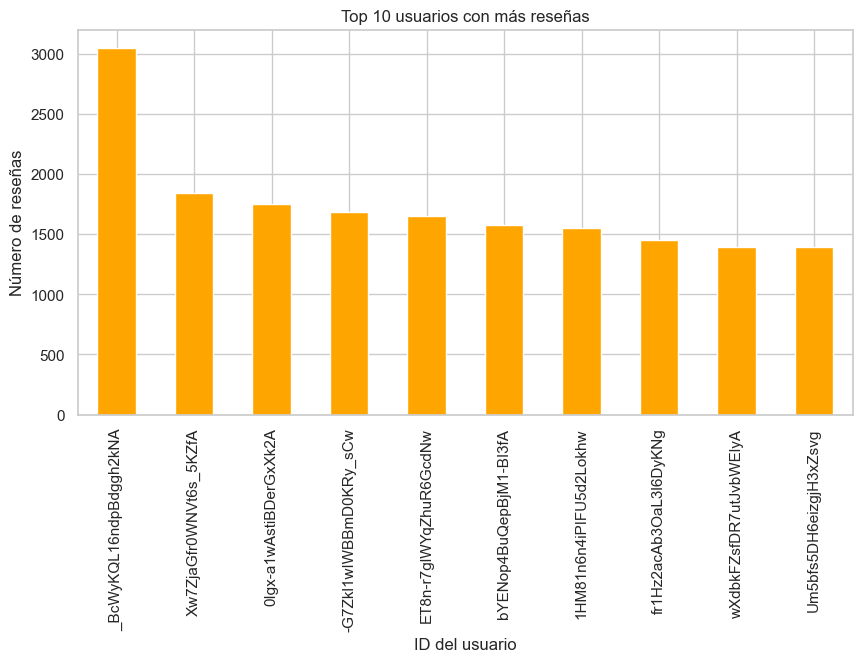

In [66]:
# Usuarios con más reseñas
top_users = df_review['user_id'].value_counts().head(10)
print("Usuarios más activos:\n", top_users)

# Visualizar usuarios más activos
top_users.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title("Top 10 usuarios con más reseñas")
plt.xlabel("ID del usuario")
plt.ylabel("Número de reseñas")
plt.show()

Negocios más reseñados:
 business_id
_ab50qdWOk0DdB6XOrBitw    7673
ac1AeYqs8Z4_e2X5M3if2A    7516
GXFMD0Z4jEVZBCsbPf4CTQ    6160
ytynqOUb3hjKeJfRj5Tshw    5778
oBNrLz4EDhiscSlbOl8uAw    5264
iSRTaT9WngzB8JJ2YKJUig    5254
VQcCL9PiNL_wkGf-uF3fjg    5146
_C7QiQQc47AOEv4PE3Kong    4969
GBTPC53ZrG1ZBY3DT8Mbcw    4661
6a4gLLFSgr-Q6CZXDLzBGQ    4480
Name: count, dtype: int64


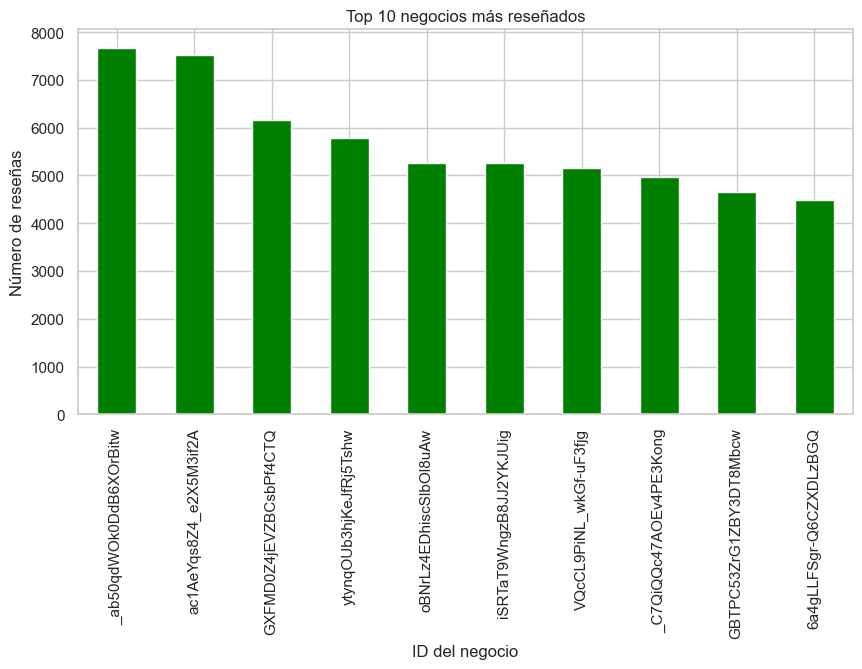

In [67]:
# Negocios con más reseñas
top_businesses = df_review['business_id'].value_counts().head(10)
print("Negocios más reseñados:\n", top_businesses)

# Visualizar
top_businesses.plot(kind='bar', figsize=(10, 5), color='green')
plt.title("Top 10 negocios más reseñados")
plt.xlabel("ID del negocio")
plt.ylabel("Número de reseñas")
plt.show()

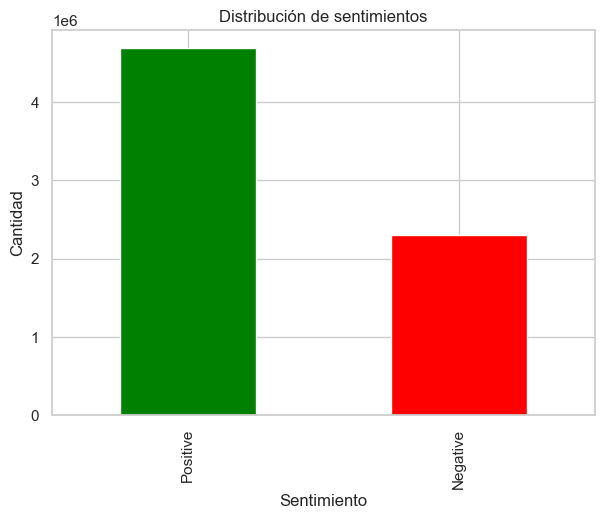

In [68]:
# Clasificar reseñas como positivas o negativas basadas en 'stars'
df_review['sentiment'] = df_review['stars'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')

# Conteo de sentimientos
sentiment_counts = df_review['sentiment'].value_counts()

# Visualización
sentiment_counts.plot(kind='bar', figsize=(7, 5), color=['green', 'red'])
plt.title("Distribución de sentimientos")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad")
plt.show()

Nube de palabras

In [69]:
# Tomamos una muestra aleatoria de 10000 filas
muestra = df_review.sample(n=10000, random_state=42) 

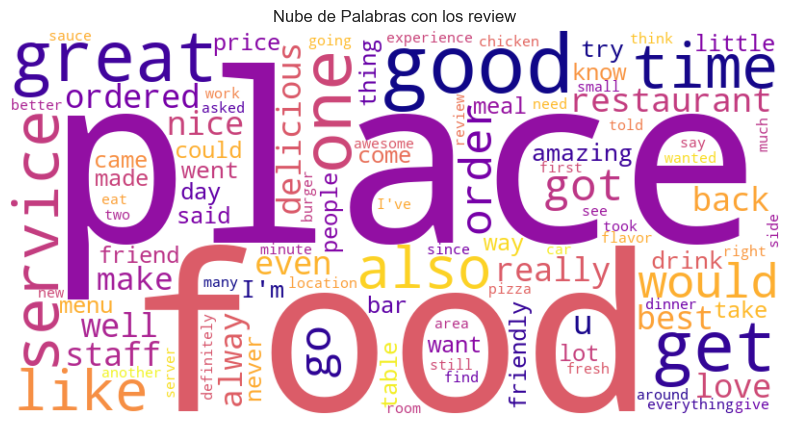

In [70]:
# Concatenamos todas las descripciones del título en una sola cadena
texto_nube = ' '.join(muestra['text'])

# Creamos la nube de palabras
nube_palabras = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400, colormap='plasma').generate(texto_nube)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras con los review')
plt.show()

Palabras más destacadas:
*"place" y "food"* : Estas palabras son las más grandes y destacadas, lo que indica que los comentarios suelen centrarse en la experiencia general del lugar y en la calidad de la comida, que son factores principales en la evaluación de restaurantes.

*"genial" , "bueno" , "servicio" , "tiempo"*: Estas palabras reflejan las opiniones positivas sobre la calidad del servicio y la experiencia en general. Los términos "great" y "good" destacan por su uso frecuente, sugiriendo una tendencia hacia experiencias mayoritariamente satisfactorias.

*"ordered" , "got" , "eat" , "drink" , "menu"* : Estas palabras están relacionadas con las acciones directas asociadas con la visita a un restaurante, como ordenar, comer y beber. También refleja la importancia del menú como punto de evaluación.

*"like" , "would" , "also" , " one"* : Estas palabras, aunque más genéricas, podrían indicar aspectos relacionados con la preferencia y la recomendación (por ejemplo, "me gusta este lugar" o "también recomendaría").

En general el análisis muestra:

*Un enfoque positivo* : Muchas palabras tienen connotaciones positivas como "genial", "bueno", "nice", "amazing", "love", "delicious", lo que sugiere que las experiencias satisfactorias son comunes en esta muestra de reseñas.

*La importancia del servicio* : Palabras como "service", "staff", "friendly", y "server" resaltan que la calidad del servicio es un punto importante en las opiniones de los clientes.

*La frecuencia de acciones y calidad de la comida* : Palabras relacionadas con la acción como "ordered", "got", "came", "went" junto con términos que describen la comida como "delicious", "sabor", "fresh" demuestran que los clientes evalúan tanto lo que piden como la calidad percibida.

*La experiencia en el tiempo* : Palabras como "time", "day", y "minuto" podrían reflejar que los tiempos de espera o la duración de la experiencia son factores mencionados en los comentarios.

**Conclusiones:**

La calidad de la comida y la experiencia en el lugar son las principales preocupaciones de los clientes.
Los clientes valoran mucho la amabilidad y atención del personal, lo cual podría ser un diferenciador para los restaurantes que brindan un buen servicio.
La frecuencia de palabras positivas indica que, en general, las experiencias tienden a ser satisfactorias.